# Shuttle Statlog Data Set Classifier - Breeder Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import copy
%matplotlib inline

In [2]:
import GeneticProgram as gp
from Statlog import load_statlog
from SamplingPolicies import *

### Import Data Set

In [3]:
# Data set already scaled
train_X, train_y, test_X, test_y, num_inputs, num_classes = load_statlog()

# Create scaler based only on the training set
scaler = MinMaxScaler()
scaler.fit(train_X)

# Scale datasets
train_X = scaler.transform(train_X)
test_X  = scaler.transform(test_X)

In [4]:
fu = []

In [5]:
def breederDisplayCallback(string):
    clear_output(wait=True)
    display(string)

In [6]:
template_program = gp.Program(
     max_initial_instructions = 128,
     num_registers            = 16,
     num_inputs               = num_inputs,
     mutation_rate            = 0.1,
     max_num_instructions     = 512,
     num_classes              = num_classes
)

In [7]:
no_sharing_uniform_sampling = []

for i in range(5):
    res = gp.breederSelection(p_size                = 100,
                              p_gap                 =  70,
                              tau                   = 200,
                              template_program      = template_program,
                              sampling_policy_class = UniformSamplingPolicy,
                              max_num_generations   = 200,
                              X                     = train_X,
                              y                     = train_y,
                              display_fun           = breederDisplayCallback)

    no_sharing_uniform_sampling.append(copy.deepcopy(res))

'Round 199 - Fitness 192.0'

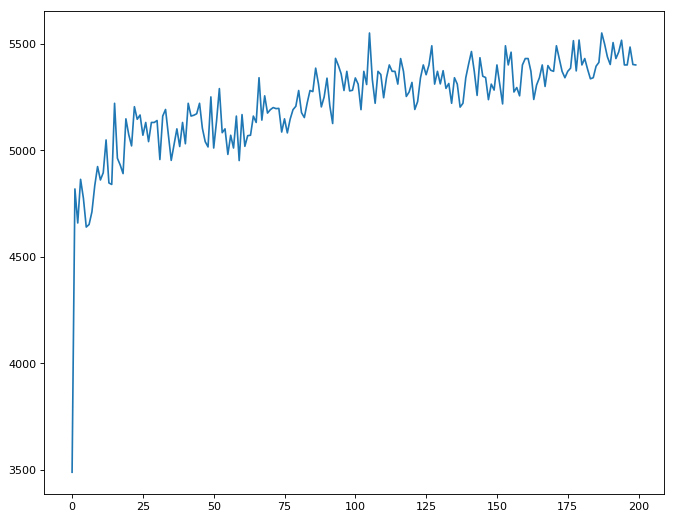

In [35]:
fitness_unions = []
for result in no_sharing_uniform_sampling:
    fitness_unions.append(result[2]['fitness_union'])
fitness_unions = np.array(fitness_unions)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.median(fitness_unions, axis=0))

In [ ]:
fu.append(np.median(fitness_unions, axis=0))

In [9]:
training_accuracies = []
for result in no_sharing_uniform_sampling:
    training_accuracies.append(result[0].accuracy(train_X, train_y))
training_accuracies = np.array(training_accuracies)
print(np.median(training_accuracies))

0.9210344827586207


In [10]:
test_accuracies = []
for result in no_sharing_uniform_sampling:
    test_accuracies.append(result[0].accuracy(test_X, test_y))
test_accuracies = np.array(test_accuracies)
print(np.median(test_accuracies))

0.9237241379310345


In [11]:
train_det_rates = []
for result in no_sharing_uniform_sampling:
    train_det_rates.append(result[0].detectionRate(train_X, train_y))
train_det_rates = np.array(train_det_rates)
print(np.median(train_det_rates))

0.3543856523951975


In [12]:
test_det_rates = []
for result in no_sharing_uniform_sampling:
    test_det_rates.append(result[0].detectionRate(test_X, test_y))
test_det_rates = np.array(test_det_rates)
print(np.median(test_det_rates))

0.35467546018920604


In [13]:
no_sharing_class_sampling = []

for i in range(5):
    res = gp.breederSelection(p_size                = 100,
                              p_gap                 =  70,
                              tau                   = 200,
                              template_program      = template_program,
                              sampling_policy_class = ClassUniformSamplingPolicy,
                              max_num_generations   = 200,
                              X                     = train_X,
                              y                     = train_y,
                              display_fun           = breederDisplayCallback)

    no_sharing_class_sampling.append(copy.deepcopy(res))

'Round 199 - Fitness 116.0'

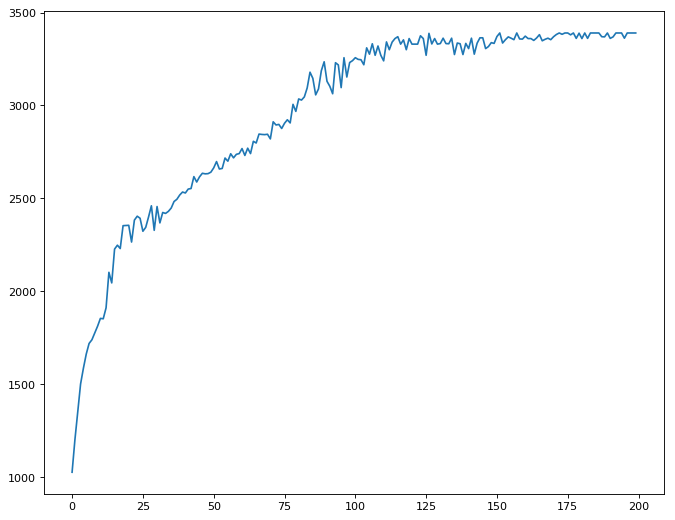

In [49]:
fitness_unions = []
for result in no_sharing_class_sampling:
    fitness_unions.append(result[2]['fitness_union'])
fitness_unions = np.array(fitness_unions)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.median(fitness_unions, axis=0))

In [ ]:
fu.append(np.median(fitness_unions, axis=0))

In [15]:
training_accuracies = []
for result in no_sharing_class_sampling:
    training_accuracies.append(result[0].accuracy(train_X, train_y))
training_accuracies = np.array(training_accuracies)
print(np.median(training_accuracies))

0.5226896551724138


In [16]:
test_accuracies = []
for result in no_sharing_class_sampling:
    test_accuracies.append(result[0].accuracy(test_X, test_y))
test_accuracies = np.array(test_accuracies)
print(np.median(test_accuracies))

0.5183448275862069


In [17]:
train_det_rates = []
for result in no_sharing_class_sampling:
    train_det_rates.append(result[0].detectionRate(train_X, train_y))
train_det_rates = np.array(train_det_rates)
print(np.median(train_det_rates))

0.5667591553784866


In [18]:
test_det_rates = []
for result in no_sharing_class_sampling:
    test_det_rates.append(result[0].detectionRate(test_X, test_y))
test_det_rates = np.array(test_det_rates)
print(np.median(test_det_rates))

0.5669461347287321


In [19]:
fitness_sharing_uniform_sampling = []

for i in range(5):
    res = gp.fitnessSharingBreederSelection(p_size                = 100,
                                            p_gap                 =  70,
                                            tau                   = 200,
                                            template_program      = template_program,
                                            sampling_policy_class = UniformSamplingPolicy,
                                            max_num_generations   = 200,
                                            X                     = train_X,
                                            y                     = train_y,
                                            display_fun           = breederDisplayCallback)

    fitness_sharing_uniform_sampling.append(copy.deepcopy(res))

'Round 199 - Fitness 6.958507434594392'

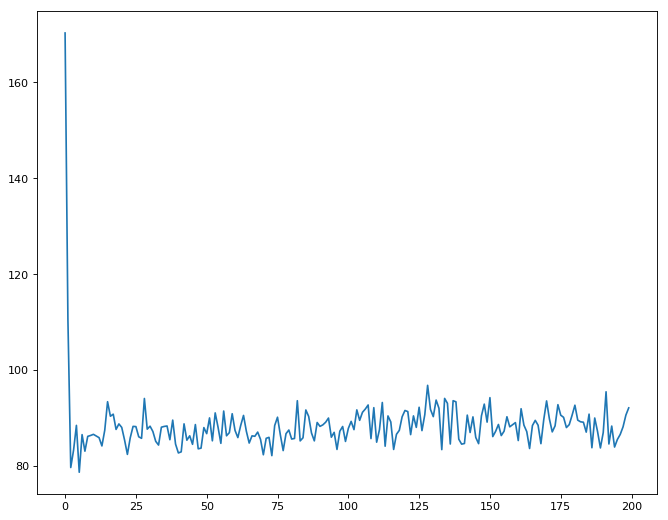

In [50]:
fitness_unions = []
for result in fitness_sharing_uniform_sampling:
    fitness_unions.append(result[2]['fitness_union'])
fitness_unions = np.array(fitness_unions)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.median(fitness_unions, axis=0))

In [ ]:
fu.append(np.median(fitness_unions, axis=0))

In [21]:
training_accuracies = []
for result in fitness_sharing_uniform_sampling:
    training_accuracies.append(result[0].accuracy(train_X, train_y))
training_accuracies = np.array(training_accuracies)
print(np.median(training_accuracies))

0.6554712643678161


In [22]:
test_accuracies = []
for result in fitness_sharing_uniform_sampling:
    test_accuracies.append(result[0].accuracy(test_X, test_y))
test_accuracies = np.array(test_accuracies)
print(np.median(test_accuracies))

0.6507586206896552


In [23]:
train_det_rates = []
for result in fitness_sharing_uniform_sampling:
    train_det_rates.append(result[0].detectionRate(train_X, train_y))
train_det_rates = np.array(train_det_rates)
print(np.median(train_det_rates))

0.14286133123356062


In [24]:
test_det_rates = []
for result in fitness_sharing_uniform_sampling:
    test_det_rates.append(result[0].detectionRate(test_X, test_y))
test_det_rates = np.array(test_det_rates)
print(np.median(test_det_rates))

0.14285714285714285


In [25]:
fitness_sharing_class_sampling = []

for i in range(5):
    res = gp.fitnessSharingBreederSelection(p_size                = 100,
                                            p_gap                 =  70,
                                            tau                   = 200,
                                            template_program      = template_program,
                                            sampling_policy_class = ClassUniformSamplingPolicy,
                                            max_num_generations   = 200,
                                            X                     = train_X,
                                            y                     = train_y,
                                            display_fun           = breederDisplayCallback)

    fitness_sharing_class_sampling.append(copy.deepcopy(res))

'Round 199 - Fitness 5.348349101464856'

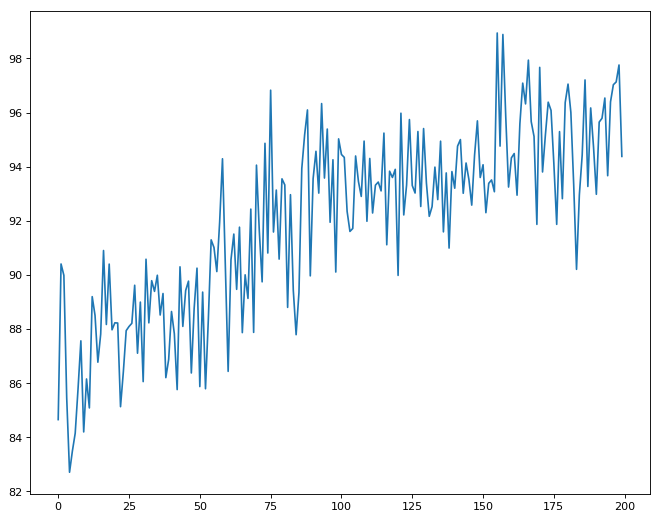

In [51]:
fitness_unions = []
for result in fitness_sharing_class_sampling:
    fitness_unions.append(result[2]['fitness_union'])
fitness_unions = np.array(fitness_unions)
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.median(fitness_unions, axis=0))

In [ ]:
fu.append(np.median(fitness_unions, axis=0))

In [27]:
training_accuracies = []
for result in fitness_sharing_class_sampling:
    training_accuracies.append(result[0].accuracy(train_X, train_y))
training_accuracies = np.array(training_accuracies)
print(np.median(training_accuracies))

0.043954022988505745


In [28]:
test_accuracies = []
for result in fitness_sharing_class_sampling:
    test_accuracies.append(result[0].accuracy(test_X, test_y))
test_accuracies = np.array(test_accuracies)
print(np.median(test_accuracies))

0.04379310344827586


In [29]:
train_det_rates = []
for result in fitness_sharing_class_sampling:
    train_det_rates.append(result[0].detectionRate(train_X, train_y))
train_det_rates = np.array(train_det_rates)
print(np.median(train_det_rates))

0.3397683397683398


In [30]:
test_det_rates = []
for result in fitness_sharing_class_sampling:
    test_det_rates.append(result[0].detectionRate(test_X, test_y))
test_det_rates = np.array(test_det_rates)
print(np.median(test_det_rates))

0.3626373626373626


In [ ]:
# Retain copy of results in case I do some tweaking
orig_fu = copy.deepcopy(fu)

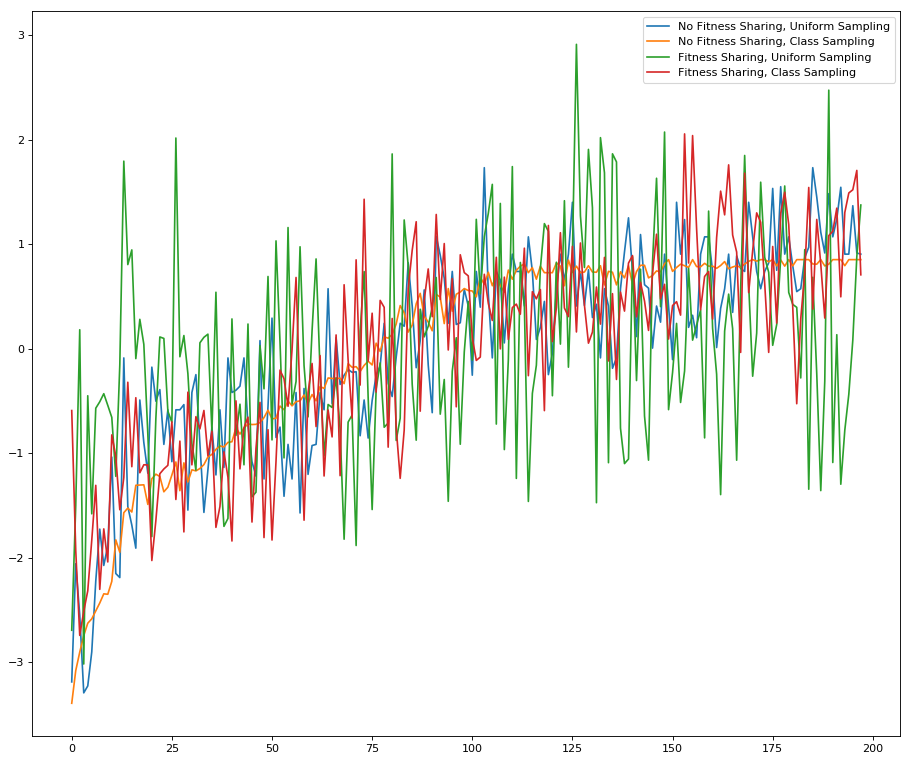

In [48]:
fu = np.array(orig_fu)
index_skip = 2

# Create scaler based only on the training set
scaler = StandardScaler() #MinMaxScaler()

# Scale datasets
fig=plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')
for f in fu:
    scaler.fit(f[index_skip:].reshape(-1, 1))
    f = scaler.transform(f[index_skip:].reshape(-1, 1))
    plt.plot(f)

plt.legend([
    'No Fitness Sharing, Uniform Sampling',
    'No Fitness Sharing, Class Sampling',
    'Fitness Sharing, Uniform Sampling',
    'Fitness Sharing, Class Sampling'
])
plt.show()